## 2.1 kNN概述

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import os

%matplotlib inline

In [2]:
def create_dataset():
    group = np.array([[1.0, 1.1], [1.0, 1.0], [0, 0], [0, 0.1]])
    labels = ['A', 'A', 'B', 'B']
    return group, labels

In [3]:
def classify0(inX, dataset, labels, k):
    dataset_size = dataset.shape[0]
    
    # 距离计算
    diff_mat = np.tile(inX, (dataset_size, 1)) - dataset
    sq_diff_mat = diff_mat ** 2
    sq_distances = sq_diff_mat.sum(axis=1)
    distances = sq_distances ** 0.5
    
    sorted_dist_indices = distances.argsort()  # 距离排序
    
    # 选取最近 k 个点
    class_count = {}
    for i in range(k):
        vote_i_label = labels[sorted_dist_indices[i]]
        class_count[vote_i_label] = class_count.get(vote_i_label, 0) + 1
    
    # k个点中出现最多的类别
    sorted_class_count = sorted(class_count.items(), key=lambda x : x[1], reverse=True)   
    return sorted_class_count[0][0]

In [4]:
group, labels = create_dataset()
classify0([0, 0], group, labels, 3)

'B'

## 2.2 示例：约会网站配对

In [5]:
def read_data(filename):
    data = []
    labels = []
    with open(filename, 'r') as f:
        for line in f:
            list_from_line = line.strip().split('\t')
            data.append(list_from_line[:3])
            labels.append(list_from_line[-1])
    f.close()
    return np.array(data, dtype=float), np.array(labels, dtype=int)

In [6]:
def normalize(data):
    max_val = np.max(data, axis=0)
    min_val = np.min(data, axis=0)
    return (data - min_val) / (max_val - min_val), max_val - min_val, min_val

In [7]:
def plot_2d(data, labels):
    plt.figure(1, figsize=(14, 12))
    
    plt.subplot(221)
    plt.scatter(data[:, 0], data[:, 1], 15.0 * labels, 15.0 * labels)
    plt.title('game and ice-cream')
    
    plt.subplot(222)
    plt.scatter(data[:, 1], data[:, 2], 12.0 * labels, 12.0 * labels)
    plt.title('ice-cream and flight')
    
    plt.subplot(223)
    plt.scatter(data[:, 0], data[:, 2], 12.0 * labels, 12.0 * labels)
    plt.title('game and flight')

    plt.show()
    
def plot_3d(data, labels):
    fig = plt.figure(figsize=(14, 12))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data[:, 0], data[:, 1], data[:, 2], 12.0 * labels, 12.0 * labels, 12.0 * labels)

In [8]:
dating_data, dating_labels = read_data('datingTestSet2.txt')
data_norm, ranges, min_val = normalize(dating_data)

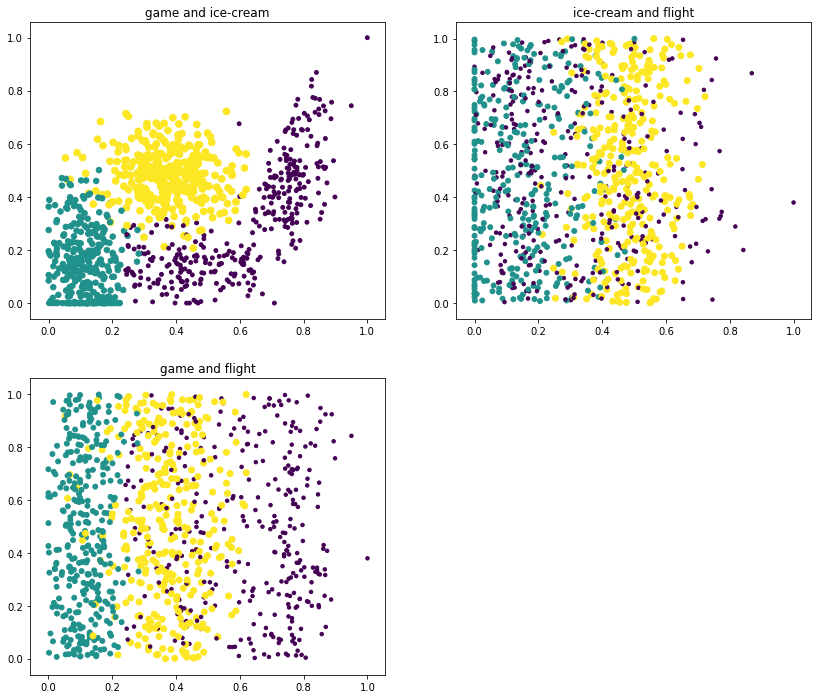

In [9]:
plot_2d(data_norm, dating_labels)

/Users/gaussic/anaconda/envs/tensorflow/lib/python3.5/site-packages/mpl_toolkits/mplot3d/art3d.py:724: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
/Users/gaussic/anaconda/envs/tensorflow/lib/python3.5/site-packages/mpl_toolkits/mplot3d/art3d.py:726: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':


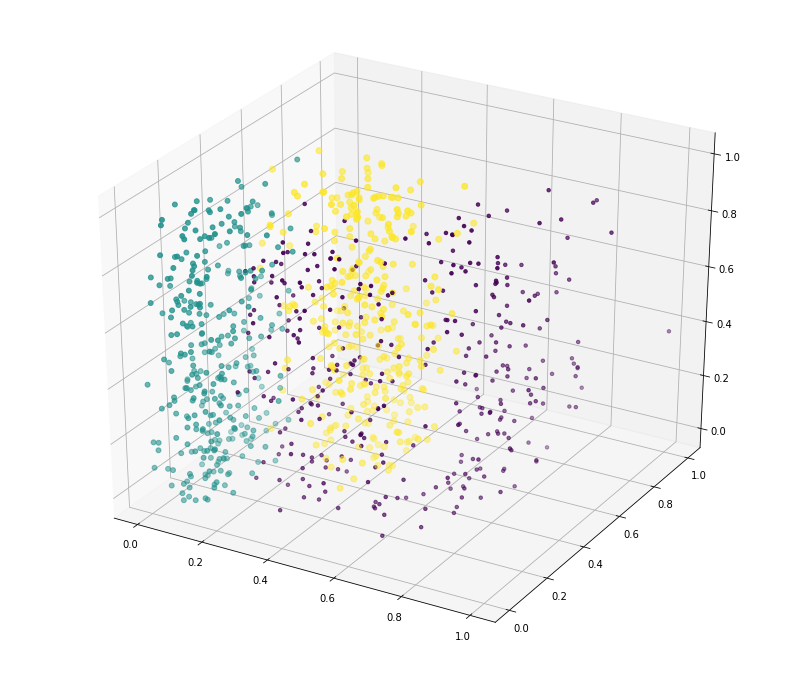

In [10]:
plot_3d(data_norm, dating_labels)

In [11]:
def dating_class_test(k=3):
    num_test = int(data_norm.shape[0] * 0.1)
    error_count = 0.0
    
    for i in range(num_test):
        class_result = classify0(data_norm[i, :], data_norm[num_test:, :], dating_labels[num_test:], k)
        print('The classifier came back with: %d, the real answer is: %d' % (class_result, dating_labels[i]))
        if class_result != dating_labels[i]:
            error_count += 1
    print('Total error rate is: %f' % (error_count / num_test))

In [12]:
dating_class_test(5)

The classifier came back with: 3, the real answer is: 3
The classifier came back with: 2, the real answer is: 2
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 3, the real answer is: 3
The classifier came back with: 3, the real answer is: 3
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 3, the real answer is: 3
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 2, the real answer is: 2
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 1, the real answe

In [13]:
def classify_person():
    result_list = ['not at all', 'in small doses', 'in large doses']
    percent_tats = float(input('Percentage of time spent playing video games? '))
    ff_miles = float(input('Frequent flier miles earned per year? '))
    ice_cream = float(input('Liters of ice cream consumed per year? '))
    in_x = np.array([ff_miles, percent_tats, ice_cream])
    class_result = classify0((in_x - min_val) / ranges, data_norm, dating_labels, 3)
    print("You will probably like this person:", result_list[class_result - 1])

In [14]:
classify_person()

Percentage of time spent playing video games? 200
Frequent flier miles earned per year? 200
Liters of ice cream consumed per year? 200
You will probably like this person: in large doses


## 2.3 手写识别系统

In [15]:
def image_2_vec(filename):
    with open(filename, 'r') as f:
        digit = ""
        for line in f:
            digit += line.strip()
    return np.array(list(map(int, list(digit))))

def read_from_dir(dirname):
    data = []
    label = []
    file_list = os.listdir(dirname)
    for file in file_list:
        data.append(image_2_vec('{}/{}'.format(dirname, file)))
        label.append(int(file.split('_')[0]))
    return np.array(data), np.array(label)

In [16]:
training_data, training_label = read_from_dir('trainingDigits')
test_data, test_label = read_from_dir('testDigits')

In [17]:
def handwriting_class_test(k=3):
    error_count = 0.0
    for i in range(test_data.shape[0]):
        class_result = classify0(test_data[i], training_data, training_label, k)
        # print("The classifier came back with: %d, the real answer is: %d" % (class_result, test_label[i]))
        if class_result != test_label[i]:
            error_count += 1
    
    print("The total number of errors is: %d" % error_count)
    print("The total error rate is: %f" % (error_count / test_data.shape[0]))

In [18]:
handwriting_class_test()

The total number of errors is: 11
The total error rate is: 0.011628
